In [64]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

def generate_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
    y = A * np.exp(-sigma * t) * np.sin(omega * t)
    rnd = np.random.RandomState(random_state) #random_state
    error = noise * rnd.randn(t.size)
    #print('t.size =', t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 35
    return y + error

A = 2
sigma = 0.1
omega = 0.1 * 2 * np.pi
x_true = np.array([A, sigma, omega])

noise = 0.1

t_min = 0
t_max = 30

In [65]:
t_train = np.linspace(t_min, t_max, 30)
y_train = generate_data(t_train, A, sigma, omega, noise=noise, n_outliers=4)

t.size = 30


In [66]:
def fun(x, t, y):
    return x[0] * np.exp(-x[1] * t) * np.sin(x[2] * t) - y

In [67]:
x0 = np.ones(3)

In [68]:
from scipy.optimize import least_squares

In [69]:
res_lsq = least_squares(fun, x0, args=(t_train, y_train))

In [70]:
res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(t_train, y_train))

In [71]:
t_test = np.linspace(t_min, t_max, 300)
y_test = generate_data(t_test, A, sigma, omega)

t.size = 300


In [72]:
y_lsq = generate_data(t_test, *res_lsq.x)
y_robust = generate_data(t_test, *res_robust.x)

t.size = 300
t.size = 300


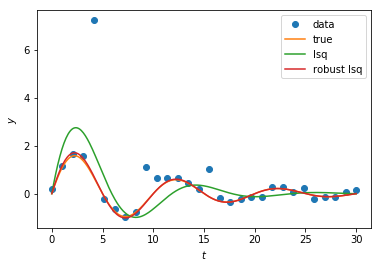

In [73]:
plt.plot(t_train, y_train, 'o', label='data')
plt.plot(t_test, y_test, label='true')
plt.plot(t_test, y_lsq, label='lsq')
plt.plot(t_test, y_robust, label='robust lsq')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();